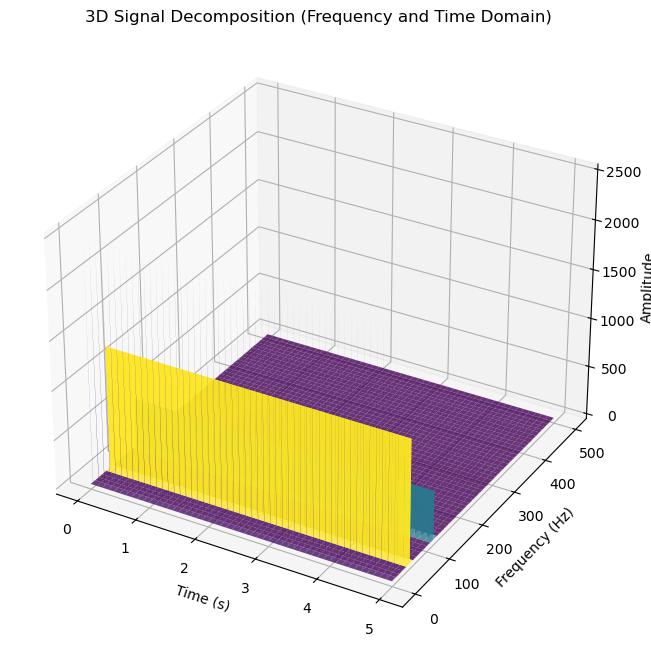

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the signal
sampling_rate = 1000  # in Hz
duration = 5  # in seconds
time = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

# Creating a composite signal
freq1, freq2, freq3 = 5, 50, 120  # Frequencies in Hz
signal = (np.sin(2 * np.pi * freq1 * time) + 
          0.5 * np.sin(2 * np.pi * freq2 * time) +
          0.2 * np.sin(2 * np.pi * freq3 * time))

# Add some noise
noise = np.random.normal(0, 0.1, signal.shape)
signal += noise

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)

# Get positive half of the spectrum
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft = np.abs(fft_result[:len(fft_result)//2])

# Create a 3D visualization of signal decomposition
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Time and Frequency as a grid for visualization
time_grid, freq_grid = np.meshgrid(time, positive_freqs)

# Amplitude grid based on FFT result
amplitude_grid = np.outer(positive_fft, np.ones_like(time))

# Plot the signal decomposition
ax.plot_surface(time_grid, freq_grid, amplitude_grid, cmap='viridis', alpha=0.8)
ax.set_title("3D Signal Decomposition (Frequency and Time Domain)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_zlabel("Amplitude")

plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the signal
sampling_rate = 1000  # in Hz
duration = 2  # in seconds
time = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

# Creating a composite signal
freq1, freq2, freq3 = 5, 50, 120  # Frequencies in Hz
signal = (np.sin(2 * np.pi * freq1 * time) + 
          0.5 * np.sin(2 * np.pi * freq2 * time) +
          0.2 * np.sin(2 * np.pi * freq3 * time))

# Add some noise
noise = np.random.normal(0, 0.1, signal.shape)
signal += noise

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)

# Get positive half of the spectrum
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft = np.abs(fft_result[:len(fft_result)//2])

# Prepare the frequency grid
freq_grid = np.outer(positive_freqs, np.ones_like(positive_freqs))

# Set up the figure and axis for the 3D animation
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Initial plot setup
surface = None
ax.set_xlim(0, duration)
ax.set_ylim(0, positive_freqs[-1])
ax.set_zlim(-1, 1)
ax.set_title("3D Signal Decomposition (Frequency and Time Domain - Animated)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_zlabel("Amplitude")

# Update function for animation
def update(frame):
    global surface
    if surface is not None:
        surface.remove()  # Remove old surface
    t = time[frame]
    amplitude_grid = np.outer(positive_fft, np.sin(2 * np.pi * t))
    surface = ax.plot_surface(
        positive_freqs[:, None], freq_grid, amplitude_grid, cmap='viridis', alpha=0.8
    )
    return surface,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), interval=30, blit=False)

# Save the animation as a file
ani.save('signal_decomposition_animation.mp4', writer='ffmpeg', fps=30)

plt.show()



C:\Users\stefa\AppData\Local\Temp\ipykernel_26108\3541841073.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the signal
sampling_rate = 1000  # in Hz
duration = 2  # in seconds
time = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

# Creating a composite signal
freq1, freq2, freq3 = 5, 50, 120  # Frequencies in Hz
signal = (np.sin(2 * np.pi * freq1 * time) + 
          0.5 * np.sin(2 * np.pi * freq2 * time) +
          0.2 * np.sin(2 * np.pi * freq3 * time))

# Add some noise
noise = np.random.normal(0, 0.1, signal.shape)
signal += noise

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/sampling_rate)

# Get positive half of the spectrum
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft = np.abs(fft_result[:len(fft_result)//2])

# Create grids for the 3D plot
X, Y = np.meshgrid(positive_freqs, time)

# Set up the figure and axis for the 3D animation
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Initial surface plot
Z = np.zeros_like(X)  # Initialize Z values as zero
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Set plot limits
ax.set_xlim(positive_freqs.min(), positive_freqs.max())
ax.set_ylim(0, duration)
ax.set_zlim(-1, 1)
ax.set_title("3D Signal Decomposition (Frequency and Time Domain - Animated)")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Time (s)")
ax.set_zlabel("Amplitude")

# Update function for animation
def update(frame):
    global surface
    surface.remove()  # Remove old surface
    t = time[frame]
    Z = np.sin(2 * np.pi * t) * positive_fft[:, None]  # Dynamically calculate Z
    surface = ax.plot_surface(X, Y, Z.T, cmap='viridis', alpha=0.8)
    return surface,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), interval=30, blit=False)

# Save the animation as a file
ani.save('signal_decomposition_animation.mp4', writer='ffmpeg', fps=30)

plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001DC9C1A7060> (for post_execute), with arguments args (),kwargs {}:


ValueError: list.remove(x): x not in list